### Graphique du debit en fonction du temps

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
# importation du tableau des donnees sous forme d'une dataframe du module Pandas
df = pd.read_excel('donnees_tp1_partie2.xlsx')
# Observation des premieres lignes du tableau
df.head()  

,t (s),Q (m^3/s)
0,0.000000,68.580061
1,7.118121,50.748944
2,8.681162,60.837194
3,11.616445,50.238949
4,15.975827,63.887699


/tmp/ipykernel_45037/3773589126.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


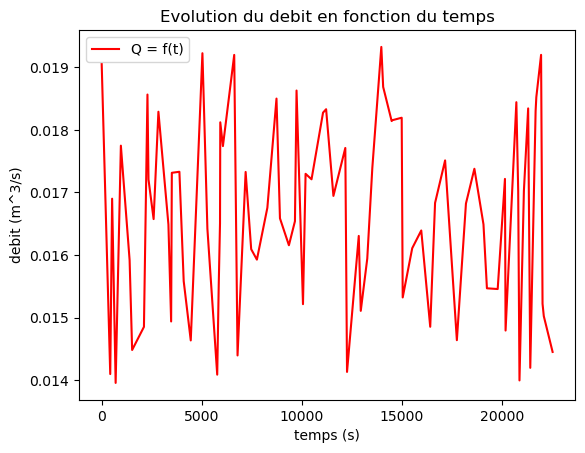

In [107]:
#conversion  de la colonne des temps en seconde
temps = df.iloc[:,0]*60

# conversion de cette colonne en liste python
temps = temps.tolist()  

# conversion du debit en mettre cube par seconde
debit = df.iloc[:,1]/3600
debit = debit.tolist()

# Tout ce qui concerne le graphique

fig,ax = plt.subplots()
ax.plot(temps,debit, label = 'Q = f(t)', color = 'red')
ax.set_ylabel('debit (m^3/s)')
ax.set_xlabel('temps (s)')
ax.set_title('Evolution du debit en fonction du temps')
ax.legend()
fig.show()

### Integration numerique par la methode des trapezes

Dans notre cas precis, les intervalles de temps ne sont pas regulier donc il faudrait revoir la formule du trapeze en prenant en compte le fait que les intervalle de temps ne sont pas constante: $$V = \frac{1}{2}\sum_{i=0}^{n-1}\Delta t_i*\left(Q_{i+1}+Q_{i}\right)$$ avec $V$ le volume, $\Delta t_i$ le pas de temps et $Q_i$ le debit volumique


In [108]:
def trap_volume(temps,debit):
    """Fonction pour effectuer le calcul du volume moyen par la methode des trapezes"""
    volume = 0
    for i in range(1,len(temps)):
        delta_t = temps[i]-temps[i-1]
        volume = volume + 0.5*delta_t*(debit[i]+debit[i-1])
    return volume
        

In [109]:
print(f'Volume moyen a travers la veine par la methode des trapezes:V ={trap_volume(temps,debit): 8.3f} m^3')

Volume moyen a travers la veine par la methode des trapezes:V = 374.480 m^3


### Calcul du volume moyen par la methode de la moyenne ponderee

Algorithme de la methode de la moyenne pondere se presente come suit:

$$V = \frac{\sum_{i=0}^n Q_i*t_i}{\sum_{i = 0}^n t_i}$$

In [110]:
def pondere_volume(temps,debit):
    """Fonction pour effectuer le calcul du volume moyen par la methode de la moyenne ponderee"""
    volume = 0
    temps_total = temps[0]
    for i in range(1,len(temps)):
        temps_total = temps_total +temps[i]
        volume = volume + (temps[i]*debit[i])
    return (volume/temps_total)*(temps[len(temps)-1]-temps[0])

In [111]:
print(f'Volume moyen a travers la veine par la methode de la moyenne ponderee :V ={pondere_volume(temps,debit): 8.3f} m^3')

Volume moyen a travers la veine par la methode de la moyenne ponderee :V = 375.387 m^3


### Comparaison des deux valeurs

In [112]:
ecart = abs( pondere_volume(temps,debit)-rect_volume2(temps,debit))/pondere_volume(temps,debit)
print(f"l'ecart relatif entre les deux valeurs du volume moyen est donc: ecart ={ecart: 6.5f}")

l'ecart relatif entre les deux valeurs du volume moyen est donc: ecart = 0.00346
